**CUSTOMER CHURN ANALYSIS**

Data loading

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv("churn_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Data cleaning

In [7]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [8]:
df.drop(columns="customerID",inplace=True)

Churn rate

In [9]:
churn_counts=df['Churn'].value_counts(normalize=True)*100
print(churn_counts)

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


Histogram of tenure by churn status

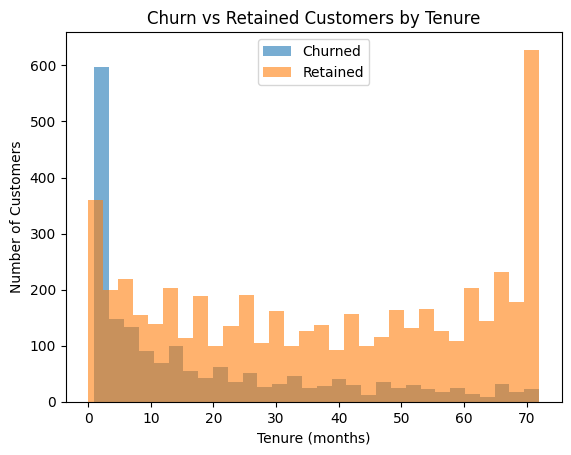

In [10]:
df[df['Churn']=="Yes"]['tenure'].plot.hist(bins=30, alpha=0.6, label="Churned")
df[df['Churn']=="No"]['tenure'].plot.hist(bins=30, alpha=0.6, label="Retained")
plt.legend()
plt.xlabel("Tenure (months)")
plt.ylabel("Number of Customers")
plt.title("Churn vs Retained Customers by Tenure")
plt.show()

👉: insight:

=> Month-to-month → very high churn.

=> One year → medium churn.

=> Two year → very low churn (long contracts = stability).

Plot stacked bar chart for churn breakdown




In [19]:
# Categorize tenure into buckets
def categorize_tenure(tenure):
    if tenure <= 12:
        return "0-12 months"
    elif tenure <= 36:
        return "13-36 months"
    else:
        return "37+ months"

df["TenureCategory"] = df["tenure"].apply(categorize_tenure)

In [20]:
churn_dist = df.groupby(["TenureCategory", "Churn"]).size().unstack(fill_value=0)

/tmp/ipython-input-2775812426.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i, row.cumsum()[j] - val/2, f"{val/total:.1%}",


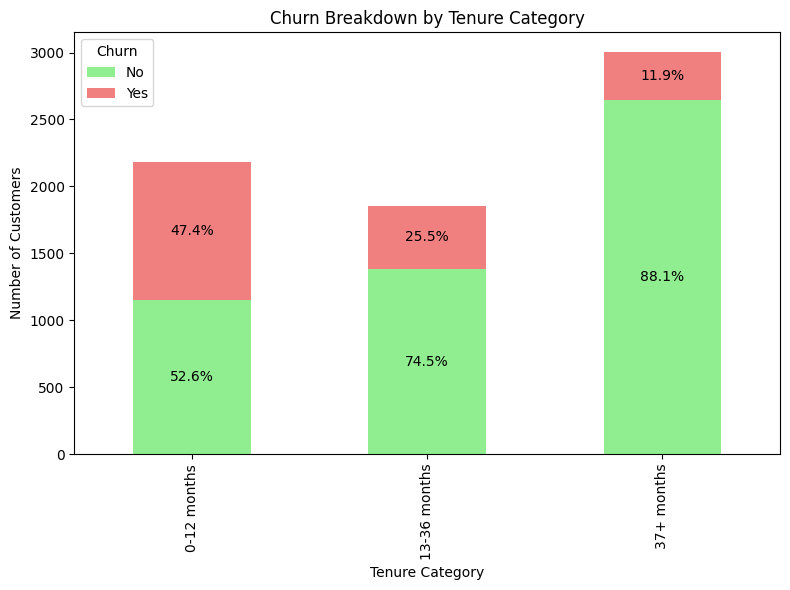

In [22]:
fig, ax = plt.subplots(figsize=(8,6))
churn_dist.plot(kind="bar", stacked=True, ax=ax, color=["lightgreen", "lightcoral"])

for i, (cat, row) in enumerate(churn_dist.iterrows()):
    total = row.sum()
    for j, val in enumerate(row):
        ax.text(i, row.cumsum()[j] - val/2, f"{val/total:.1%}",
                ha="center", va="center", color="black")

ax.set_title("Churn Breakdown by Tenure Category")
ax.set_ylabel("Number of Customers")
ax.set_xlabel("Tenure Category")
ax.legend(title="Churn", labels=["No", "Yes"])

plt.tight_layout()
plt.show()

/tmp/ipython-input-717318149.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes[1].text(i, row.cumsum()[j] - val/2, f"{val/total:.1%}",


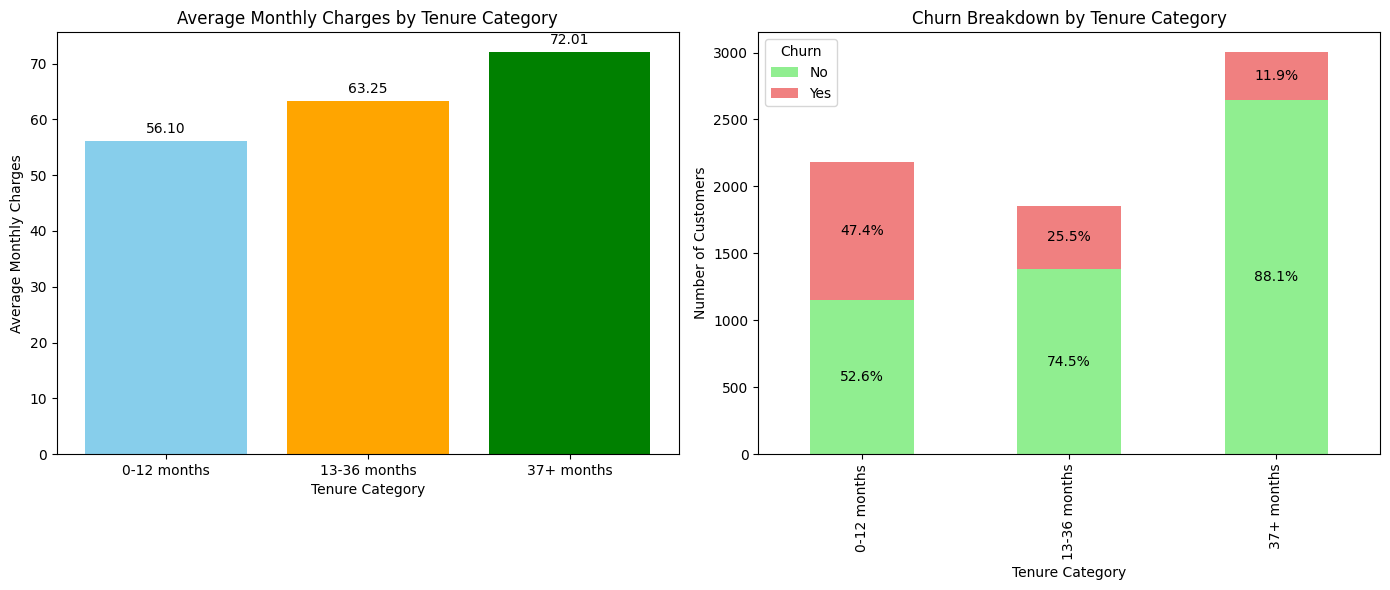

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Average Monthly Charges by Tenure Category ---
avg_charges = df.groupby("TenureCategory")["MonthlyCharges"].mean().reset_index()

# --- Churn Breakdown ---
churn_dist = df.groupby(["TenureCategory", "Churn"]).size().unstack(fill_value=0)

# --- Plot both side by side ---
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# --- Chart 1: Avg Monthly Charges ---
bars = axes[0].bar(avg_charges["TenureCategory"], avg_charges["MonthlyCharges"],
                   color=['skyblue','orange','green'])
axes[0].set_title("Average Monthly Charges by Tenure Category")
axes[0].set_ylabel("Average Monthly Charges")
axes[0].set_xlabel("Tenure Category")

# Add annotations on top of bars
for bar in bars:
    yval = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2, yval + 1, f"{yval:.2f}",
                 ha='center', va='bottom')

# --- Chart 2: Churn Breakdown ---
churn_dist.plot(kind="bar", stacked=True, ax=axes[1], color=["lightgreen", "lightcoral"])
axes[1].set_title("Churn Breakdown by Tenure Category")
axes[1].set_ylabel("Number of Customers")
axes[1].set_xlabel("Tenure Category")
axes[1].legend(title="Churn", labels=["No", "Yes"])

# Add percentage annotations inside bars
for i, (cat, row) in enumerate(churn_dist.iterrows()):
    total = row.sum()
    for j, val in enumerate(row):
        axes[1].text(i, row.cumsum()[j] - val/2, f"{val/total:.1%}",
                     ha="center", va="center", color="black")

plt.tight_layout()
plt.show()


**Insights from Tenure vs. Churn**

>0–12 months → Highest churn (customers haven’t formed loyalty yet).

>13–36 months → Medium churn (they’ve experienced service but might leave if competitors offer better deals).

>37+ months → Lowest churn (loyal customers, but still important to retain).

✔**Recommended Actions:**

❄ For 0–12 month customers (New Customers / High Risk):

>Onboarding offers: Discounts for first 6 months, free add-ons (e.g., streaming, security).

>Engagement: Personalized welcome emails, frequent communication via social media.

>Customer Support: Proactive check-ins, ensure smooth setup and issue resolution.

❄ For 13–36 month customers (Mid-Tenure / Moderate Risk)

>Loyalty rewards: Limited-time offers, seasonal discounts, or bundled services.

>Cost reduction: Provide slightly lower monthly charges for high-value customers.

>Upgrade incentives: Offer better internet speed / premium service at discounted upgrade rates.

❄ For 37+ month customers (Long-Term / Low Risk but Valuable)

>VIP treatment: Exclusive offers, recognition (loyalty badges, anniversary discounts).

>Retention perks: Free months after long contracts, family/friends referral benefits.

>Upselling: Introduce higher-tier plans that match their needs.

🎯 Business Value

>Reduces churn in early stage customers (where loss is highest).

>Keeps mid-tenure customers engaged so they don’t compare competitors.

>Rewards loyal long-term customers, increasing Customer Lifetime Value (CLV).